In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os

In [65]:
folder = 'PPO_tests'

In [108]:
df = pd.read_csv(f'{folder}/PPO_actor0.0003_critic0.009_timestep4000.csv')

In [99]:
def plot_rewards(df):
    rewards = df['Reward']
    rewards_t = torch.tensor(rewards, dtype=torch.float)
    plt.title('DQN Result')
    plt.xlabel('Episode')
    plt.ylabel('Total Rewards')

    plt.scatter(range(len(rewards_t)), rewards_t.numpy(), color="tab:blue", label='Rewards', s=2)

    if len(rewards_t) >= 100:
        means = rewards_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy(), color="tab:orange", label='100-episode average')
    plt.legend()
    plt.show()

PPO_actor0.0001_critic0.001_timestep1000.csv


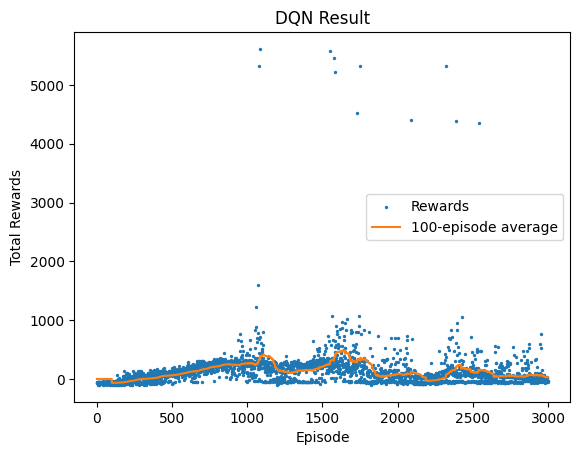

PPO_actor0.0001_critic0.001_timestep4000.csv


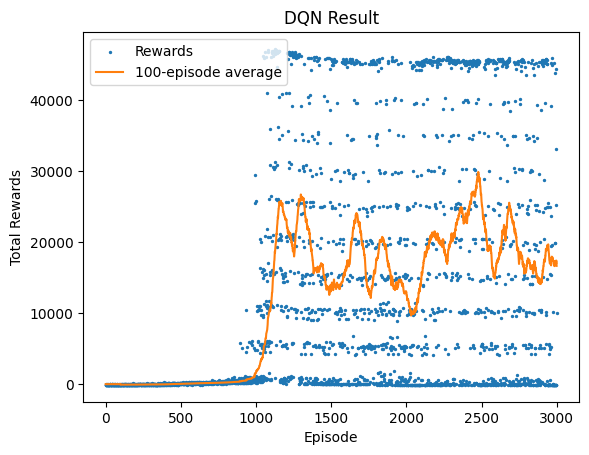

PPO_actor0.0001_critic0.001_timestep9000.csv


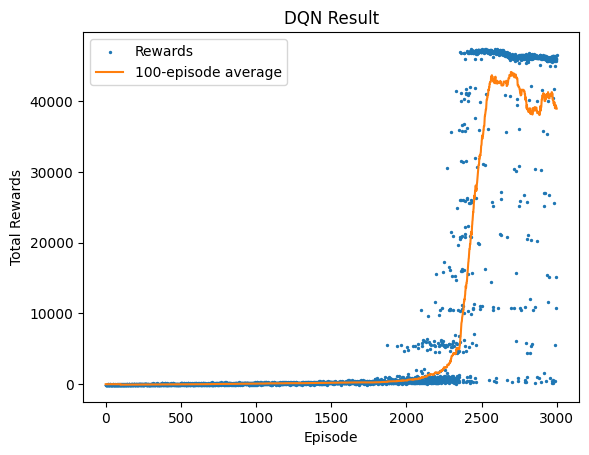

PPO_actor0.0001_critic0.005_timestep1000.csv


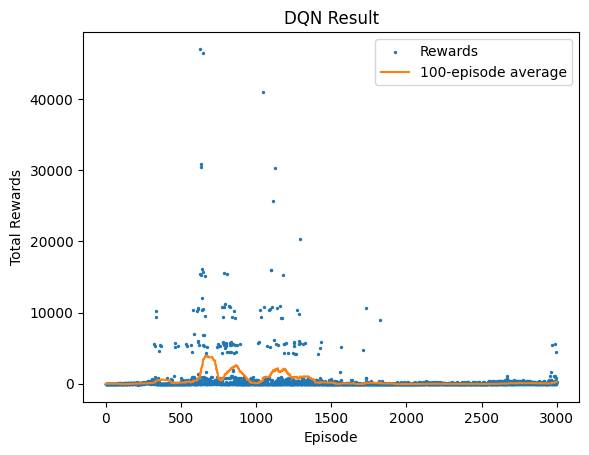

PPO_actor0.0001_critic0.005_timestep4000.csv


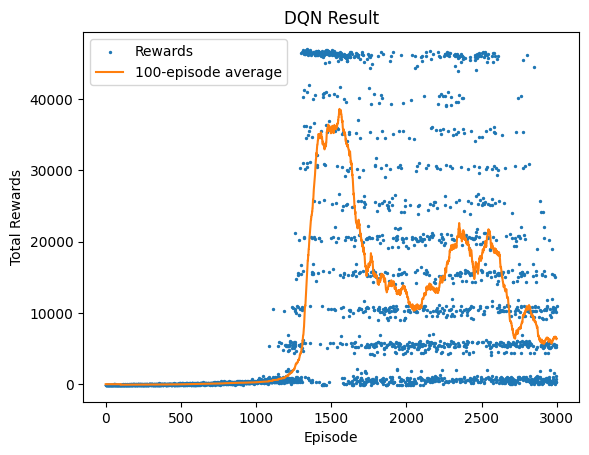

PPO_actor0.0001_critic0.005_timestep9000.csv


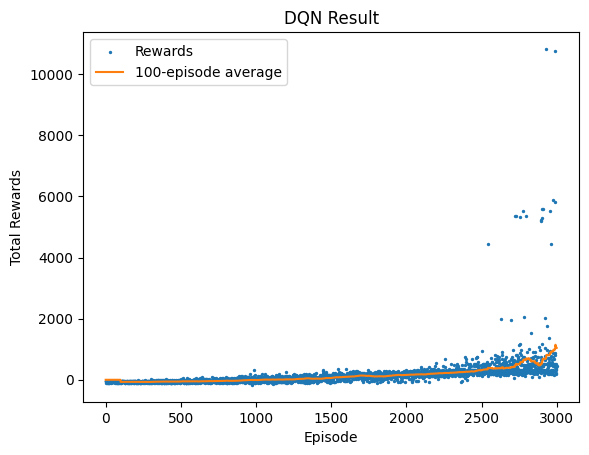

PPO_actor0.0001_critic0.009_timestep1000.csv


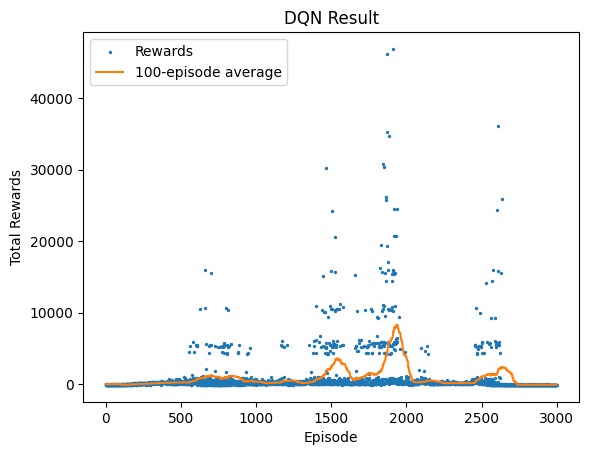

PPO_actor0.0001_critic0.009_timestep4000.csv


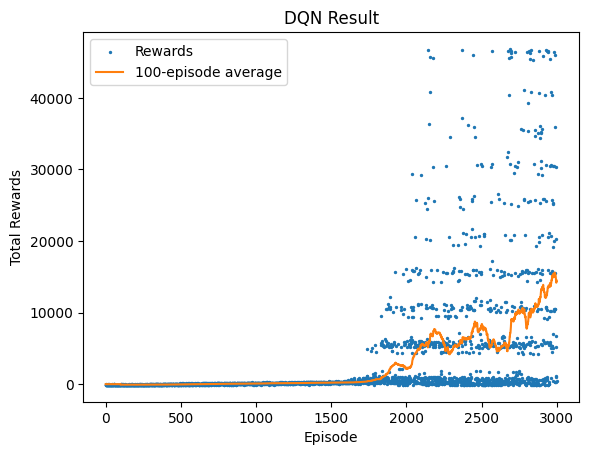

PPO_actor0.0001_critic0.009_timestep9000.csv


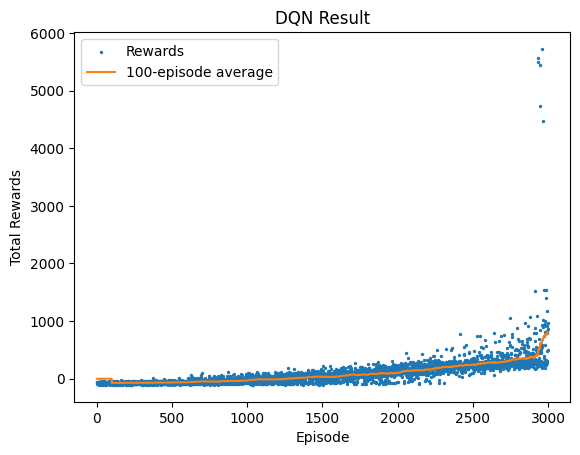

PPO_actor0.0003_critic0.001_timestep1000.csv


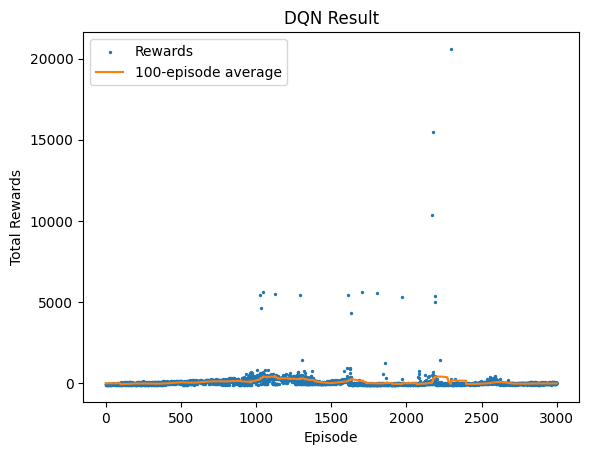

PPO_actor0.0003_critic0.001_timestep4000.csv


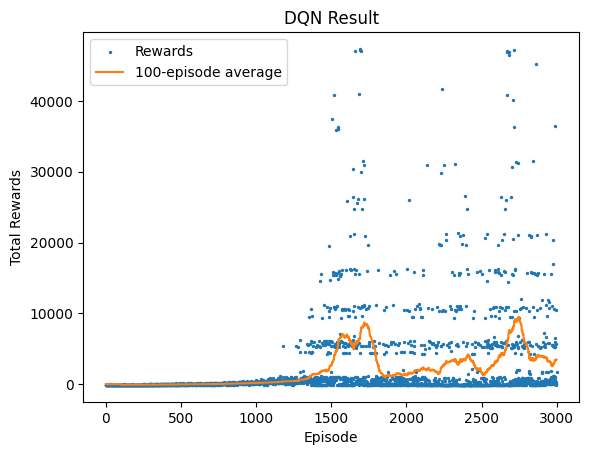

PPO_actor0.0003_critic0.001_timestep9000.csv


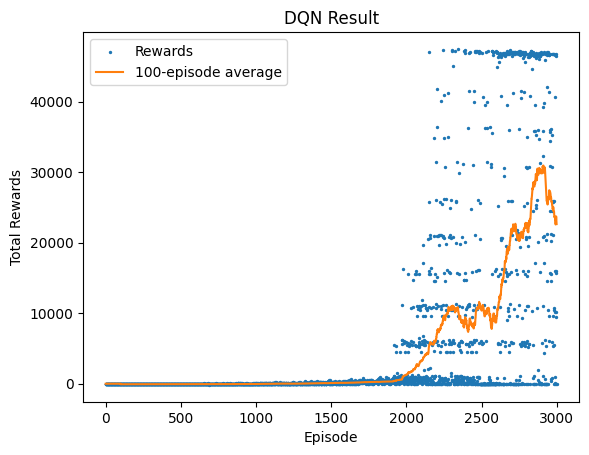

PPO_actor0.0003_critic0.005_timestep1000.csv


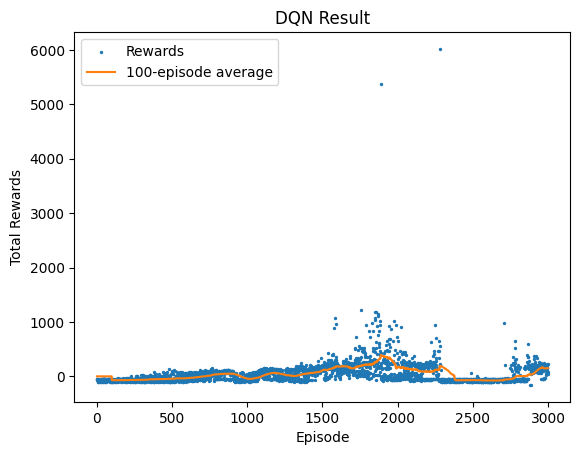

PPO_actor0.0003_critic0.005_timestep4000.csv


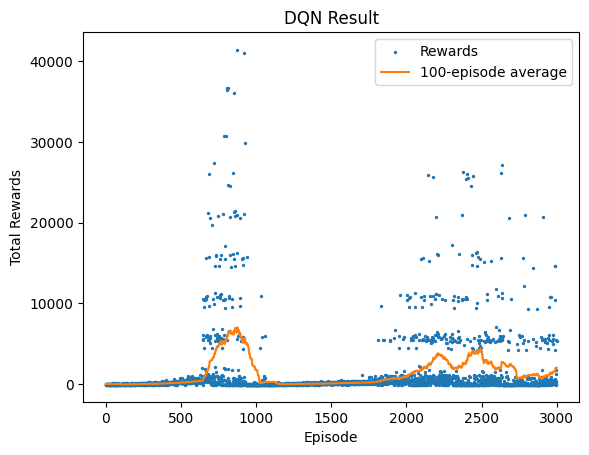

PPO_actor0.0003_critic0.005_timestep9000.csv


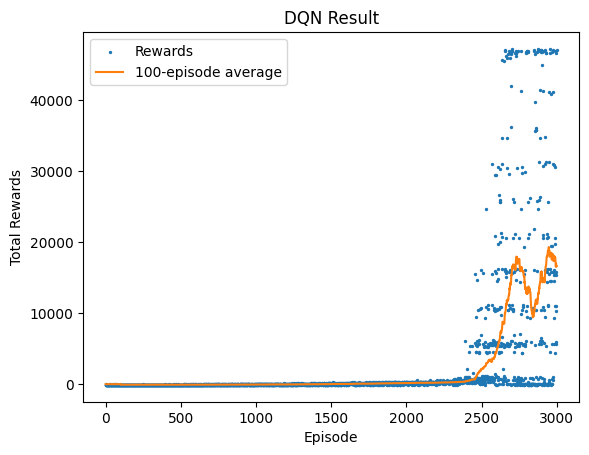

PPO_actor0.0003_critic0.009_timestep1000.csv


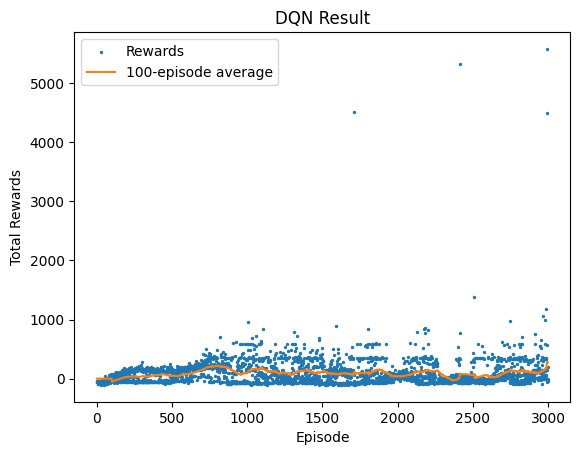

PPO_actor0.0003_critic0.009_timestep4000.csv


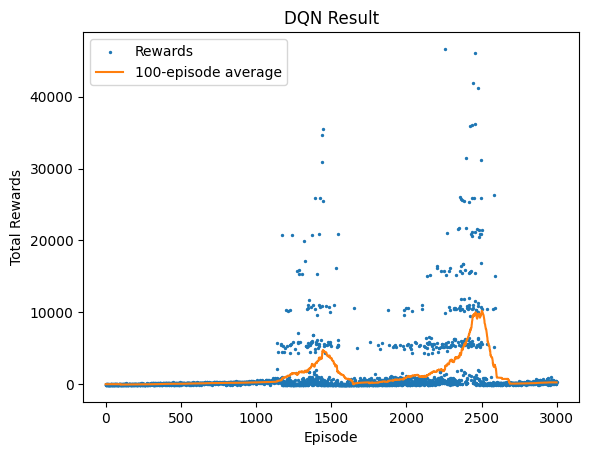

PPO_actor0.0003_critic0.009_timestep9000.csv


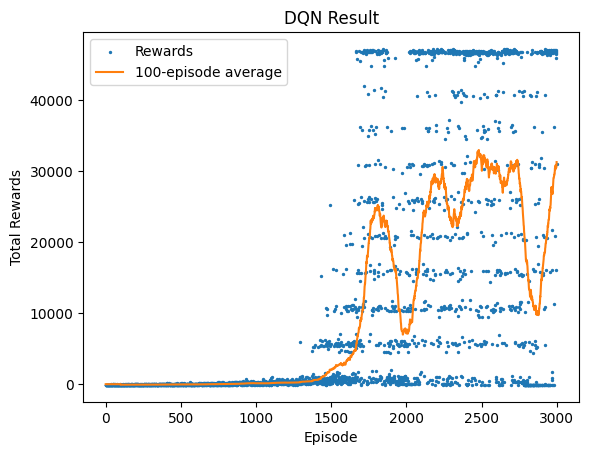

PPO_actor0.0005_critic0.001_timestep1000.csv


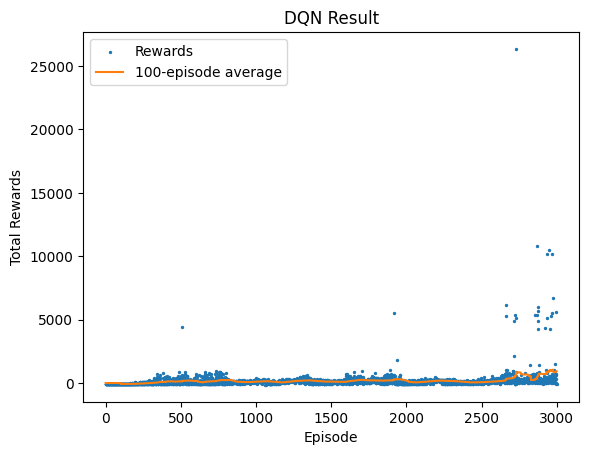

PPO_actor0.0005_critic0.001_timestep4000.csv


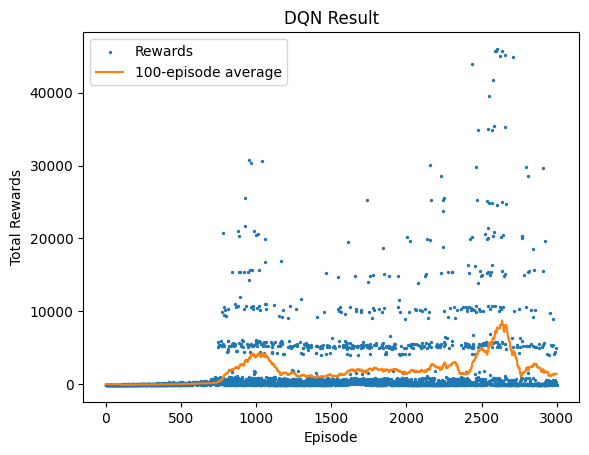

PPO_actor0.0005_critic0.001_timestep9000.csv


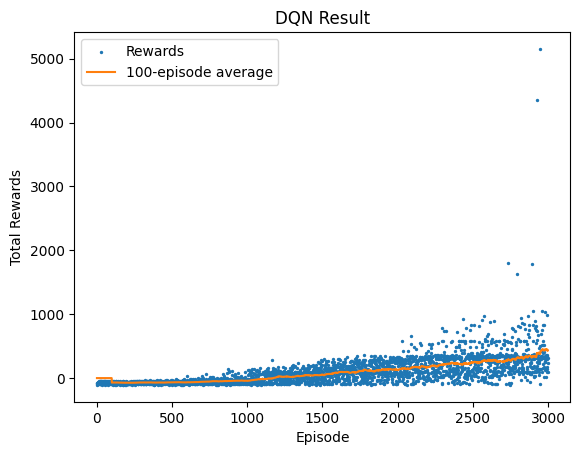

PPO_actor0.0005_critic0.005_timestep1000.csv


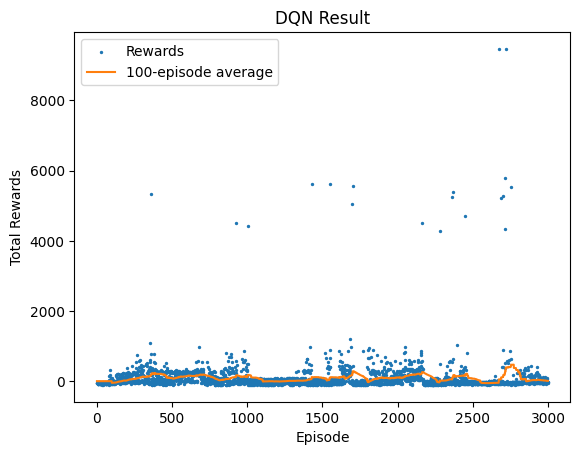

PPO_actor0.0005_critic0.005_timestep4000.csv


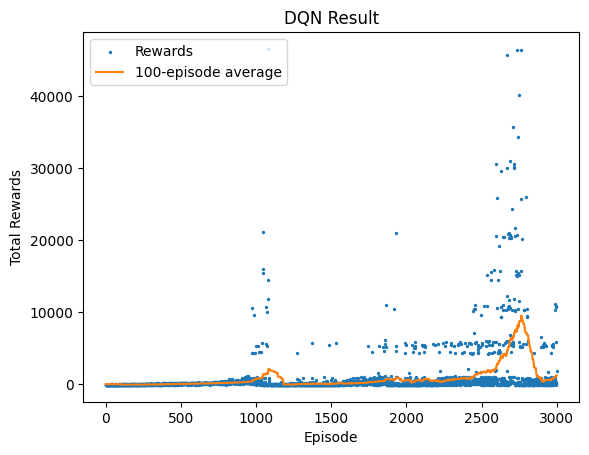

PPO_actor0.0005_critic0.005_timestep9000.csv


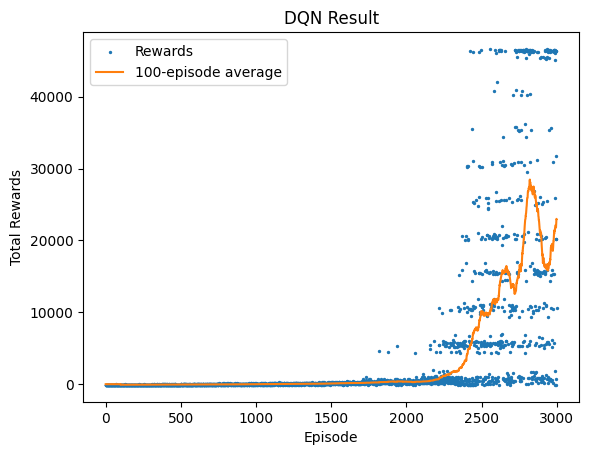

PPO_actor0.0005_critic0.009_timestep1000.csv


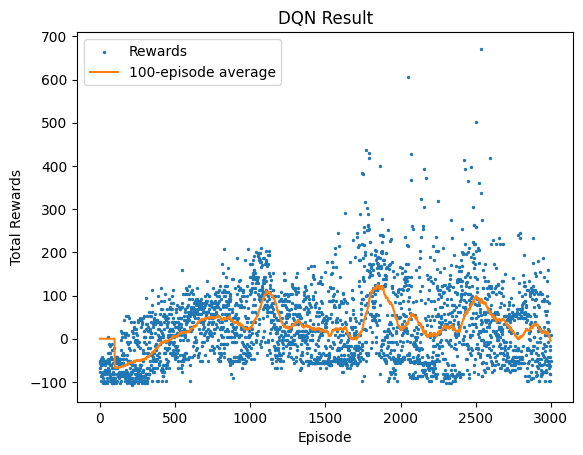

PPO_actor0.0005_critic0.009_timestep4000.csv


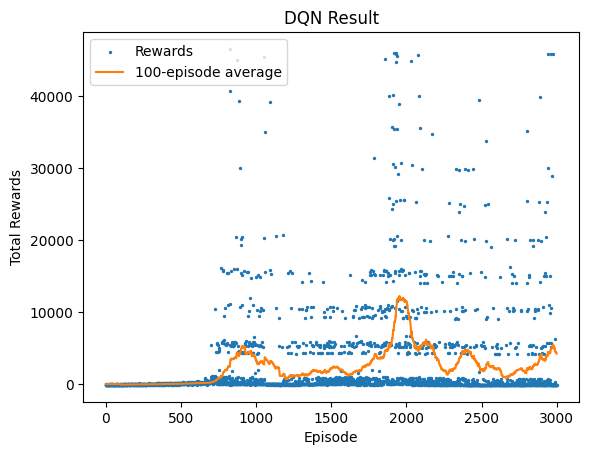

PPO_actor0.0005_critic0.009_timestep9000.csv


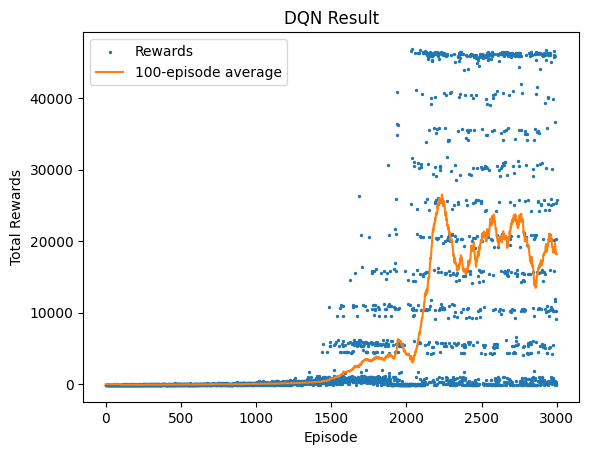

PPO_actor0.001_critic0.001_timestep1000.csv


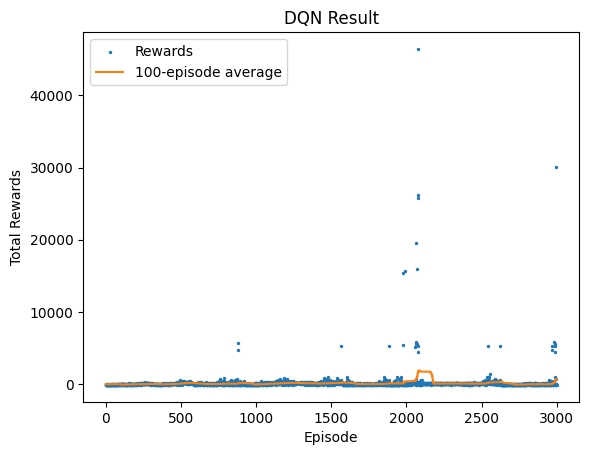

PPO_actor0.001_critic0.001_timestep4000.csv


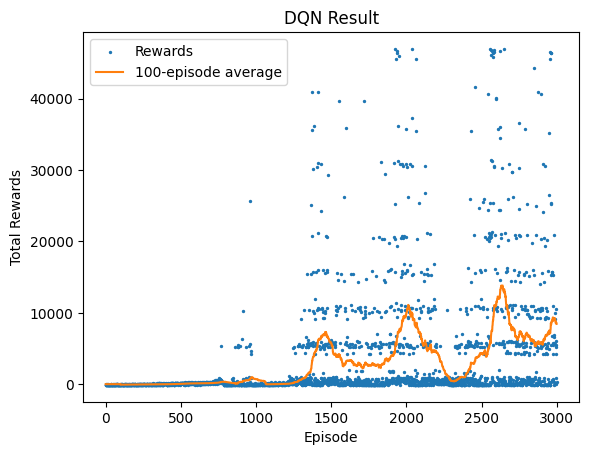

PPO_actor0.001_critic0.001_timestep9000.csv


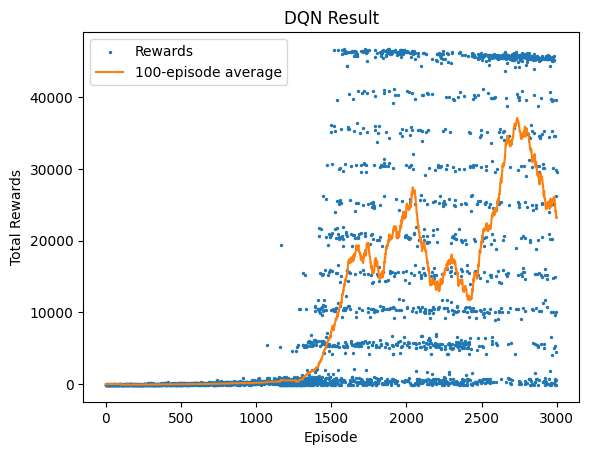

PPO_actor0.001_critic0.005_timestep1000.csv


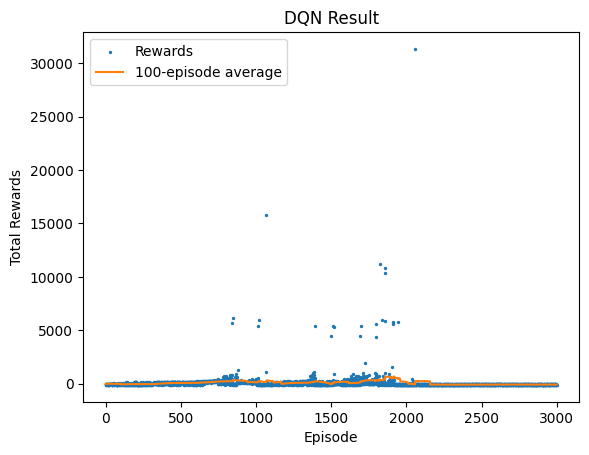

PPO_actor0.001_critic0.005_timestep4000.csv


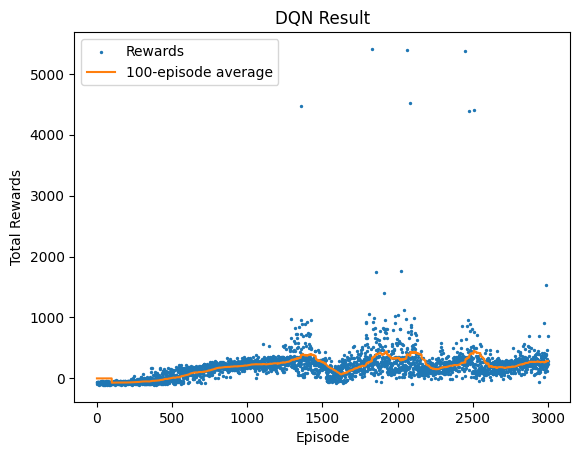

PPO_actor0.001_critic0.005_timestep9000.csv


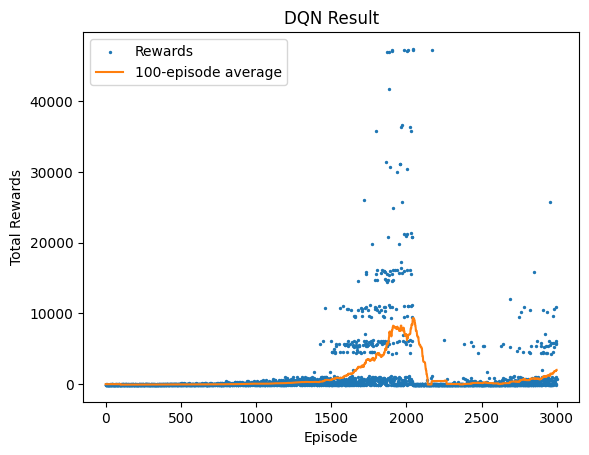

PPO_actor0.001_critic0.009_timestep1000.csv


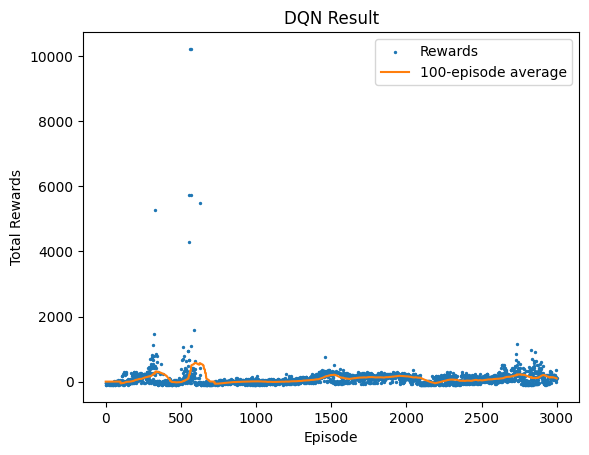

PPO_actor0.001_critic0.009_timestep4000.csv


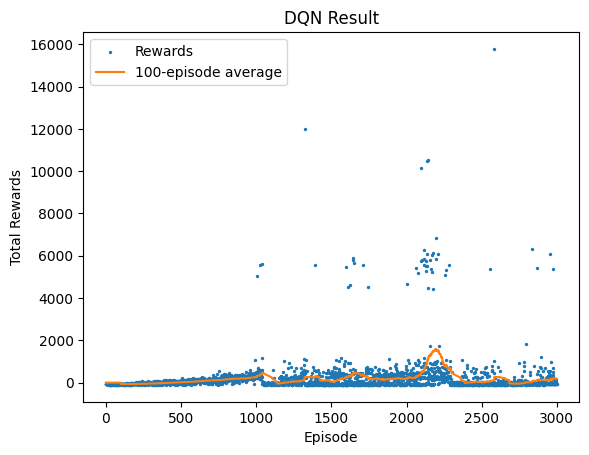

PPO_actor0.001_critic0.009_timestep9000.csv


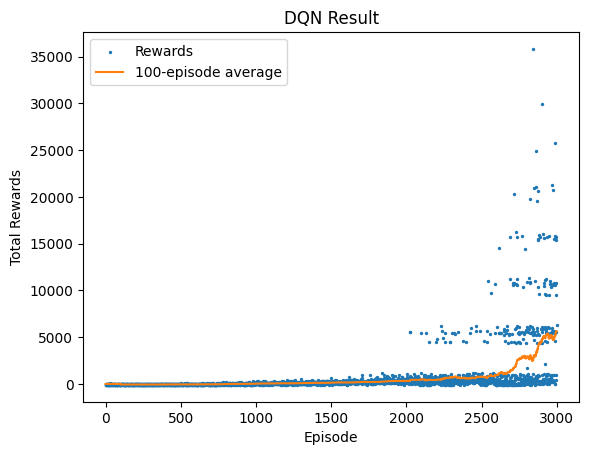

In [100]:
for file in os.listdir(folder):
    if file.startswith('PPO'):
        df = pd.read_csv(f'{folder}/{file}')
        print(file)
        plot_rewards(df)

PPO_actor0.001_critic0.009_timestep9000.csv


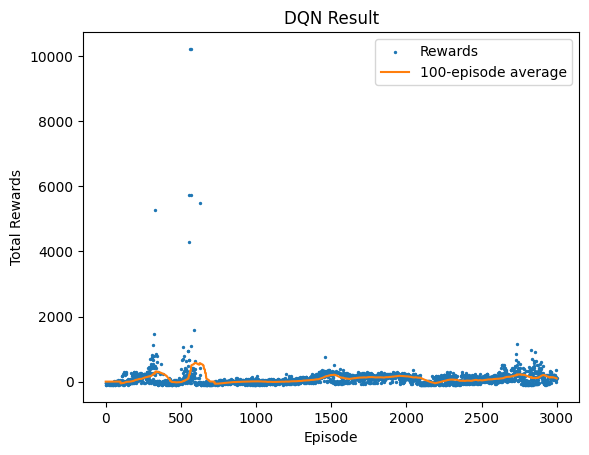

PPO_actor0.001_critic0.009_timestep9000.csv


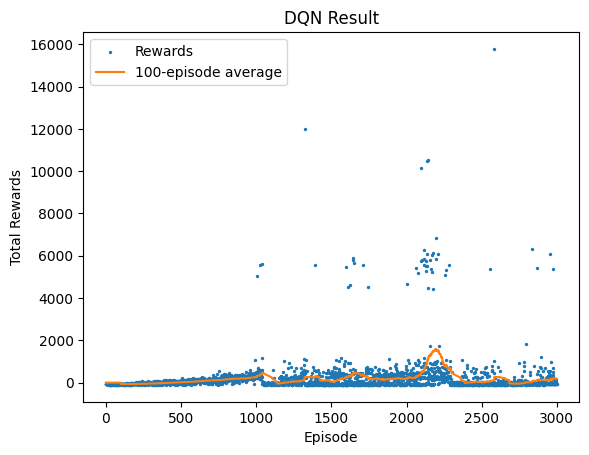

PPO_actor0.001_critic0.009_timestep9000.csv


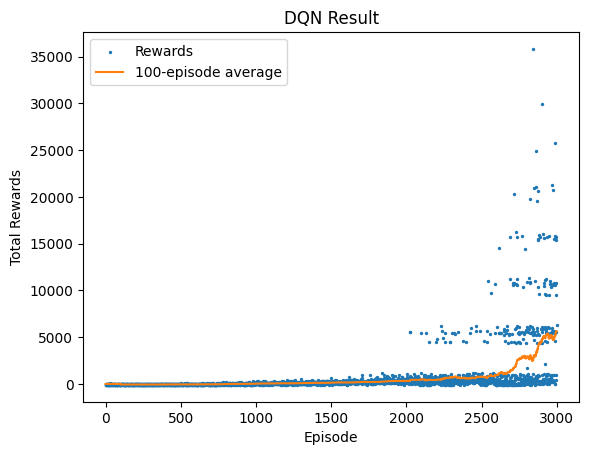

In [101]:
for tmsp in [1000,4000,9000]:
    df = pd.read_csv(f'{folder}/PPO_actor0.001_critic0.009_timestep{tmsp}.csv')
    print(file)
    plot_rewards(df)

In [ ]:
# PERFORMANCE METRICS
# get the first row where the reward > 40k
def get_first_top_episode(df):
    return df[df['Reward'] > 400]['Episode'].values[0]

# get number of episodes where the reward > 40k
def get_num_top_episodes(df):
    return len(df[df['Reward'] > 400])

# average reward (equivalent to total cumulativee reward)
def get_avg_reward(df):
    return df['Reward'].mean()

In [118]:
# STABILITY METRICS
# average moving standard deviation
def average_moving_std(df, window_size):
    '''
    1. Gets the moving standard deviation of the reward over a window of size window_size (recommended 100).
    2. Averages all those moving standard deviations which gives the idea of how unstable the reward was over the training process.
    '''
    moving_std = df['Reward'].rolling(window=window_size).std()
    average_moving_std = moving_std.mean()
    return average_moving_std

# number of episodes where the moving average was at the top
def num_avg_top_episodes(df, window_size):
    '''
    1. Gets the moving average of the reward over a window of size window_size (recommended 100).
    2. Counts the number of times the moving average was at the top (40000).
    '''
    moving_avg = df['Reward'].rolling(window=window_size).mean()
    return len(moving_avg[moving_avg > 35000])

# moving average of the reward drop after peaking
def moving_avg_reward_drop(df, window_size):
    '''
    1. Gets the moving average of the reward over a window of size window_size (recommended 100).
    2. Gets the episode where the moving average peaked.
    3. Gets the percentage drop in the reward after the peak.
    '''
    moving_avg = df['Reward'].rolling(window=window_size).mean()
    peak_episode = moving_avg.idxmax()
    min_after_peak = moving_avg[peak_episode:].min()
    percentage_drop = (moving_avg[peak_episode] - min_after_peak) / moving_avg[peak_episode] * 100
    return percentage_drop

In [ ]:
# podemos correr os modelos treinados para tirar conclusões sobre o resultado final

In [119]:
metrics = {
    'lr_actor': [],
    'lr_critic': [],
    'update_time_steps': [],
    'first_top_episode': [],
    'num_top_episodes': [],
    'avg_reward': [],
    'avg_reward_std': [],
    'num_avg_top_ep': [],
    'rwd_drop': []
}

for lr_actor in [0.0001,0.0003,0.0005,0.001]:
    for lr_critic in [0.001, 0.005, 0.009]:
        for update_time_step in [1000, 4000, 9000]:
            df = pd.read_csv(f'{folder}/PPO_actor{lr_actor}_critic{lr_critic}_timestep{update_time_step}.csv')
            metrics['lr_actor'].append(lr_actor)
            metrics['lr_critic'].append(lr_critic)
            metrics['update_time_steps'].append(update_time_step)
            metrics['first_top_episode'].append(get_first_top_episode(df))
            metrics['num_top_episodes'].append(get_num_top_episodes(df))
            metrics['avg_reward'].append(get_avg_reward(df))
            metrics['avg_reward_std'].append(average_moving_std(df,100))
            metrics['num_avg_top_ep'].append(num_avg_top_episodes(df,100))
            metrics['rwd_drop'].append(moving_avg_reward_drop(df,100))

metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f'{folder}/metrics.csv')

In [120]:
metrics_df

,lr_actor,lr_critic,update_time_steps,first_top_episode,num_top_episodes,avg_reward,avg_reward_std,num_avg_top_ep,rwd_drop
0,0.0001,0.001,1000,846,155,129.825667,233.307580,0,107.202745
1,0.0001,0.001,4000,711,1646,12287.965333,11621.653661,0,52.832753
2,0.0001,0.001,9000,1417,981,8720.615333,3403.069448,495,13.784590
3,0.0001,0.005,1000,295,299,432.527000,1342.382346,0,101.702094
4,0.0001,0.005,4000,769,1744,10048.688333,8207.657795,128,85.335665
5,0.0001,0.005,9000,2100,255,151.911000,181.938795,0,9.217290
6,0.0001,0.009,1000,410,670,903.918667,1788.046818,0,100.941666
7,0.0001,0.009,4000,1530,936,2919.580000,3631.361001,0,9.035744
8,0.0001,0.009,9000,2058,151,97.298000,92.242298,0,0.000000
9,0.0003,0.001,1000,931,105,80.722667,348.750621,0,112.307760
